# Image en "niveaux de gris"

In [1]:
# settings for display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# turn off matplotlib figure axes, else we need to call axes('off') everytime
import matplotlib as mpl
mpl.rc('axes.spines',top=False,bottom=False,left=False,right=False)
mpl.rc(('xtick','ytick'),color=(1,1,1,0))
mpl.rc('font', size=20)

# import necessarry libs
from imageio import imread
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [8]:
# Image en "niveaux de gris"
# imageio return numpy array
from imageio import imread
img_gray = imread('composite-gray.jpg')

print(img_gray.dtype)


uint8


In [18]:
# PIL return Image
from PIL import Image
img_gray = Image.open('composite-gray.jpg')
# print(img_gray)

img_gray_np = np.asarray(img_gray)
print(img_gray_np)

[[ 96  94  92 ... 105 105 105]
 [ 95  93  91 ... 105 105 105]
 [ 93  91  90 ... 105 105 105]
 ...
 [ 94  95  96 ...  90  89  88]
 [ 97  98  99 ...  90  89  88]
 [101 101 101 ...  90  89  88]]


In [7]:
# PIL has .size
print(img_gray)
# print(img_gray.size)

<PIL.Image.Image image mode=L size=600x400 at 0x7FCA8CD42208>


In [5]:
img_gray = img_gray.resize([600, 400])
print(img_gray.size)

(600, 400)


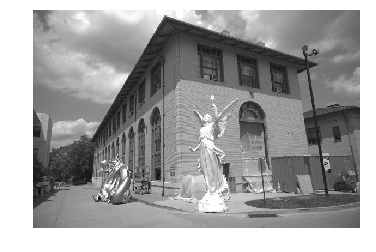

In [6]:
# use matplotlib to show image, this works for numpy array and Image
from matplotlib.pyplot import imshow
imshow(img_gray);
# PIL Image show() function will open a new window
img_gray.show()

# Lecture de ce que la camera capture vraiment

In [ ]:
imgRAW = Image.open('mandi.tif')

# let's show the image in a larger figure frame
from matplotlib.pyplot import figure
%matplotlib inline
mpl.rc('font', size=20)
fig = plt.figure(figsize=(10, 10))
plt.imshow(imgRAW);

# Interpolation de Bayer

In [2]:
from colour_demosaicing import demosaicing_CFA_Bayer_bilinear as demosaic
imgBayer = Image.fromarray(demosaic(imgRAW, 'BGGR'))
%matplotlib notebook
# the first notebook wont affect this cell
%matplotlib notebook
mpl.rc('font', size=20)
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True, sharey=True, num='Interactive plot')
ax[0].imshow(imgRAW); ax[0].set_title('image RAW');
ax[1].imshow(imgBayer); ax[1].set_title('image après interpolation de Bayer')
plt.tight_layout() # this will change the image pattern
plt.show()

NameError: name 'Image' is not defined

# Canaux

In [ ]:
img = Image.open('img-couleur.jpg');
print('[1]', 'Type:', type(img))

import numpy as np
img = np.asarray(img)
print('[2]', 'Type:', type(img), 'Shape: ', img.shape)


In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
plt.imshow(img);

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True, num='Interactive plot')
plt.set_cmap('gray')  # jet?
ax[0].imshow(img[:,:,0]); ax[0].set_title('R')
ax[1].imshow(img[:,:,1]); ax[1].set_title('G')
ax[2].imshow(img[:,:,2]); ax[2].set_title('B')
plt.tight_layout()

# Comment visualiser "seulement" la teinte?

In [ ]:
img = Image.open('img-couleur.jpg');
from skimage.color import rgb2hsv, hsv2rgb
imgHsv = rgb2hsv(img)
imgHsv[:,:,1] = 1
imgHsv[:,:,2] = 1

imgModifiee = hsv2rgb(imgHsv);
%matplotlib notebook
mpl.rc('font', size=20)
fig, ax = plt.subplots(1, 2, figsize=(20,5), sharex=True, sharey=True, num='Interactive plot')
ax[0].imshow(img); ax[0].set_title('Image originale')
ax[1].imshow(imgModifiee); ax[1].set_title('Modifiee')
plt.tight_layout()

In [ ]:
imgHsv = rgb2hsv(img)
imgHsv[:,:,1] = imgHsv[:,:,1] * 1.5  # 50% de plus de saturation!
imgHsv[:,:,1][imgHsv[:,:,1]>1] = 1  # maximum saturation should be less than 1

imgModifiee = hsv2rgb(imgHsv);
%matplotlib notebook
mpl.rc('font', size=20)
fig, ax = plt.subplots(1, 2, figsize=(20,5), sharex=True, sharey=True, num='Interactive plot')
ax[0].imshow(img); ax[0].set_title('Image originale')
ax[1].imshow(imgModifiee); ax[1].set_title('Saturation + 50%')
plt.tight_layout()

# Manipuler la saturation interactivement!

In [ ]:
imgRAW = Image.open('mandi.tif')
from colour_demosaicing import demosaicing_CFA_Bayer_bilinear as demosaic
img = Image.fromarray(demosaic(imgRAW, 'BGGR'))
img = img.resize((600,400))

%matplotlib notebook
mpl.rc('font', size=20)
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True, sharey=True, num='Interactive plot')
ax[0].imshow(img); ax[0].set_title('Image originale')
ax[1].imshow(img); ax[1].set_title('Saturation x 1')
plt.tight_layout()

from matplotlib.widgets import Slider
ax_slider = plt.axes([0.25, 0, 0.65, 0.05], facecolor='lightblue')
slider = Slider(ax_slider, 'Saturation ratio', 0, 2, valinit=1, valstep=0.05)
imgHsv = rgb2hsv(img)

def update_plot(val):
    ax[1].set_title('Saturation x %.2f' % (val))
    _imgHsv = imgHsv.copy()
    _imgHsv[...,1] = np.minimum(1, imgHsv[...,1] * val)
    img_update = hsv2rgb(_imgHsv)
    ax[1].imshow(img_update)
    fig.canvas.draw_idle()
slider.on_changed(update_plot);

# Espace de couleur lab

In [ ]:
img = Image.open('img-couleur.jpg');

from skimage.color import rgb2lab, lab2rgb
imglab = rgb2lab(img);

# visualisons la luminance et chrominance
imglab = rgb2lab(img)
imgLuminance = imglab[:,:,0]/100;
imglab[:,:,0] = 65;
imgChrominance = lab2rgb(imglab);

%matplotlib inline
mpl.rc('font', size=20)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].imshow(imgLuminance); ax[0].set_title('Luminance')
ax[1].imshow(imgChrominance); ax[1].set_title('Chrominance')
plt.tight_layout()

# Plage dynamique

In [ ]:
from imageio import imread
import imageio; imageio.plugins.freeimage.download()  # plugin to read hdr file
img = imread('memorial.hdr')  # imageio return float values
print('range in [%.2f, %.2f]' % (img.min(), img.max()))

%matplotlib notebook
%matplotlib notebook
mpl.rc('font', size=20)
fig, ax = plt.subplots(1, 2, figsize=(12,10), sharex=True, sharey=True, num='Interactive plot')
ax[0].imshow(img); ax[0].set_title('Image originale')
ax[1].imshow(img * 6); ax[1].set_title('Image x 6')
plt.tight_layout()

In [ ]:
img6 = img * 6

%matplotlib notebook
mpl.rc('font', size=20)
fig, ax = plt.subplots(1, 2, figsize=(12,10), sharex=True, sharey=True, num='Interactive plot')
ax[0].imshow(img6); ax[0].set_title('Image originale')
ax[1].imshow(img6/(1.0+img6)); ax[1].set_title('Reinhard')
plt.tight_layout()

# Égalisation d'histogramme

In [ ]:
img = imread('image40.jpg')

%matplotlib notebook
mpl.rc(('xtick','ytick'),color=(0,0,0,1))
mpl.rc('axes.spines',top=True,bottom=True,left=True,right=True)
fig, ax = plt.subplots(1, 2, figsize=(15,5), num='Plot')
imgHist, _bin_edges = np.histogram(img.flatten(), bins=256, range=(0,255))
ax[0].plot(imgHist); ax[0].grid(); ax[0].set_title('Histogramme')
imgHistCum = np.cumsum(imgHist)
ax[1].plot(imgHistCum); ax[1].grid(); ax[1].set_title('Histogramme cumulatif')
plt.tight_layout()

In [1]:
N = img.shape[0] * img.shape[1]
imgEq = (imgHistCum[img].astype('float32')*255./float(N)).astype('uint8')

%matplotlib notebook
fig, ax = plt.subplots(2, 2, figsize=(10,5), num='Image & Histogramme')
ax[0][0].imshow(img); ax[0][0].set_title('Image'); ax[0][0].axis('off')
ax[0][1].hist(img.flatten(), 255)[0]; ax[0][1].grid(); ax[0][1].set_title('Image Histogramme')
ax[1][0].imshow(imgEq); ax[1][0].grid(); ax[1][0].set_title('imgEq'); ax[1][0].axis('off')
ax[1][1].hist(imgEq.flatten(), 255)[0]; ax[1][1].grid(); ax[1][1].set_title('imgEq Histogramme')
plt.set_cmap('gray')
plt.tight_layout()

NameError: name 'img' is not defined

# On le fait pour une image couleur?

I can just write text here. 

In [ ]:
imgIn = imread('arbres.jpg').astype('float32') / 255.0;
def histeq(img):
    imgHist = np.histogram(img.flatten(), bins=256, range=(0,1))[0]
    imgHistCum = np.cumsum(imgHist)
    N = img.shape[0] * img.shape[1]
    imgEq = imgHistCum[(img*255).astype(int)]/N
    return imgEq


In [ ]:
# option 1: chaque canal independamment
imgEq1 = np.zeros(imgIn.shape)
for i_c in range(3):
    imgEq1[:,:,i_c] = histeq(imgIn[:,:,i_c])

In [ ]:
# option 1: equilibrer le canal 'L' seulement 
from skimage.color import rgb2lab, lab2rgb
imgLab = rgb2lab(imgIn);
L = imgLab[:,:,0]
# L est entre 0 et 100. mettre entre 0 et 255 pour histeq
L = L/100.0

L = histeq(L)
L = L * 100.0
imgLab[:,:,0] = L
imgEq2 = lab2rgb(imgLab);

In [ ]:
%matplotlib notebook
alpha = .5;
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(imgIn); ax[0].axis('off'); ax[0].set_title('Image originale')
ax[1].imshow(imgEq1*alpha + (1-alpha)*imgIn); ax[1].axis('off'); ax[1].set_title('Canaux indépendants');
ax[2].imshow(imgEq2*alpha + (1-alpha)*imgIn); ax[2].axis('off'); ax[2].set_title('L seulement');